## Hands-on demo 

First trying out on how to fetch data from World Bank’s famous World Development Indicators using a very handy wbdata package from python.

In [1]:
!pip install wbdata
import wbdata

In [ ]:
wbdata.get_source()

__Looking up for the Gender statistics data__

In [7]:
wbdata.search_indicators('Gender', source = 14)

SG.NOD.CONS         	Nondiscrimination clause mentions gender in the constitution (1=yes; 0=no)
SG.LAW.NODC.HR      	Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no)
SE.ENR.TERT.FM.ZS   	School enrollment, tertiary (gross), gender parity index (GPI)
SE.ENR.SECO.FM.ZS   	School enrollment, secondary (gross), gender parity index (GPI)
SE.ENR.PRSC.FM.ZS   	School enrollment, primary and secondary (gross), gender parity index (GPI)
SE.ENR.PRIM.FM.ZS   	School enrollment, primary (gross), gender parity index (GPI)
SE.ADT.1524.LT.FM.ZS	Literacy rate, youth (ages 15-24), gender parity index (GPI)


In [9]:
ind = wbdata.get_indicator('SE.ENR.SECO.FM.ZS', display=False)

In [10]:
ind

[{'id': 'SE.ENR.SECO.FM.ZS',
  'name': 'School enrollment, secondary (gross), gender parity index (GPI)',
  'source': {'id': '2', 'value': 'World Development Indicators'},
  'sourceNote': 'Gender parity index for gross enrollment ratio in secondary education is the ratio of girls to boys enrolled at secondary level in public and private schools.',
  'sourceOrganization': 'UNESCO Institute for Statistics',
  'topics': [{'id': '4', 'value': 'Education '},
   {'id': '17', 'value': 'Gender'},
   {'id': '15', 'value': 'Social Development '}]}]

In [22]:
wbdata.search_countries("United States")
wbdata.search_countries("India")

USA	United States
IND	India


In [13]:
import datetime
data_dates = (datetime.datetime(2015,1,1))

In [18]:
import pandas as pd
data = wbdata.get_dataframe({'SE.ENR.SECO.FM.ZS':'values'},
                           country = ('USA', 'CAN'),
                           data_date = data_dates,
                           convert_date = False, keep_levels = True)
data.head()

,,values
country,date,
Canada,2015,1.00839
United States,2015,1.01040


## Writing function

One specific country lookup

In [29]:
# function for specific country lookup
def country_data(country_code, indicator, start = 2015, end = 2015):
    import datetime
    import wbdata
    data_dates = (datetime.datetime(start, 1,1), datetime.datetime(end, 1,1))
    #call the api
    data = wbdata.get_dataframe({indicator: 'indicator'},
                                country=country_code, 
                                data_date=data_dates, 
                                convert_date=True, 
                                keep_levels=False)
    
    data = data.reset_index()
    #data = data.dropna() #if I want I can drop the na's
    return data[['indicator']]
    

In [21]:
country_data('IDN','SE.ENR.SECO.FM.ZS')

,indicator
0,1.01032


To return the gender indicator list of all countries 

In [7]:
# function for getting gender indicator data for all countries
def WB_country_data(indicator, start = 2015, end = 2015):
    import datetime
    import wbdata
    data_dates = (datetime.datetime(start, 1,1), datetime.datetime(end, 1,1))
    #call the api
    data = wbdata.get_dataframe({indicator: 'indicator'},
                                data_date=data_dates, 
                                convert_date=True, 
                                keep_levels=False)
    
    # data = data.reset_index()
    #data = data.dropna() #if I want I can drop the na's
    return data[['indicator']]


In [13]:
df_wb = WB_country_data('SE.ENR.SECO.FM.ZS')

df_wb['CountryName'] = df_wb.index
df_wb.head()

,indicator,CountryName
country,,
Arab World,0.92678,Arab World
Caribbean small states,1.07969,Caribbean small states
Central Europe and the Baltics,0.98861,Central Europe and the Baltics
Early-demographic dividend,1.00459,Early-demographic dividend
East Asia & Pacific,1.01198,East Asia & Pacific


In [26]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 5.5MB/s ta 0:00:01
    100% |████████████████████████████████| 16.7MB 1.7MB/s eta 0:00:01   41% |█████████████▍                  | 7.0MB 4.4MB/s eta 0:00:03
mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


__A grand function that takes as input a list of country codes, then uses our function above WB_country_data to get a list of indicators for each country,then plot a line diagram.__

In [30]:
def plot_indicators(country_list, indicator, start=2000, end=2015):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import wbdata
    import re
    ind = wbdata.get_indicator(indicator, display=False)
    # capture the title which includes the unit after bracket
    title = ind[0]['name']
    # now take entire text from first letter to before opening bracket
    title = title[:title.find('(')-1]
    # this is the patter to match anything between two brackets
    p = re.compile('\((.*?)\)')
    ylab = p.findall(ind[0]['name'])[0]
    sns.set_style('white')
    fig, axis = plt.subplots()
    for c in country_list:
        axis.plot(range(start,end+1), country_data(c,indicator,start,end))
    plt.legend(country_list)
    plt.title(title)
    plt.ylabel(ylab)
    plt.show()

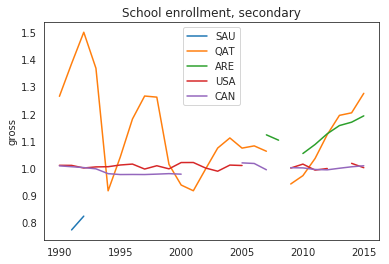

In [32]:
plot_indicators(['SAU', 'QAT', 'ARE','USA','CAN'],
                'SE.ENR.SECO.FM.ZS',1990,2015)